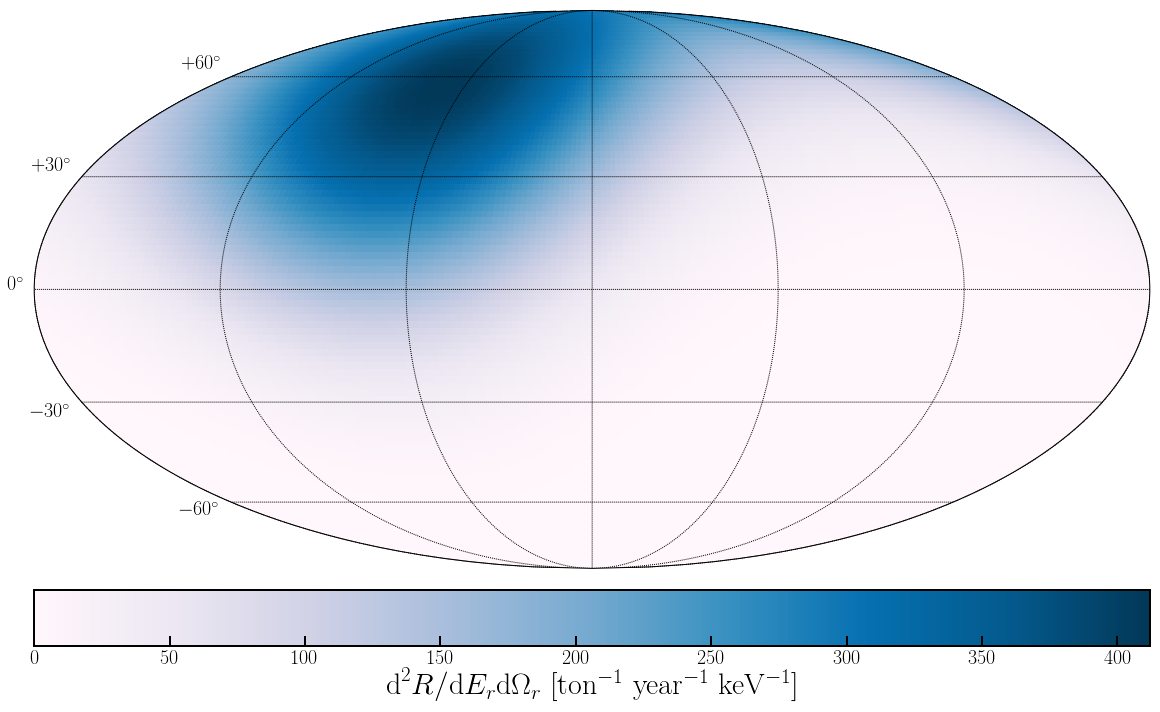

In [10]:
from mpl_toolkits.basemap import Basemap
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from LabFuncs import *
from Params import *
from WIMPFuncs import *
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)


n = 200
ph = linspace(0, 2*pi, n)
th = linspace(0,pi, n/2)
PH,TH = meshgrid(ph,th)
X = cos(PH)*sin(TH)
Y = -sin(PH)*sin(TH)
Z = cos(TH)
ii = 0
q = zeros(shape=(n*n/2,3))
for i in range(0,n/2):
    for j in range(0,n):
        q[ii,:] = array([X[i,j],Y[i,j],Z[i,j]])
        ii = ii+1

E_r = 1.0
E = E_r*q
t = array([JulianDay(9,12,2018,18.0)])
WIMP = setWIMP(6.0,1.0e-45)
HaloModel = SHM
Loc = Boulby
Nuc = Xe131
dR = WIMPRate_Direction(E,t,WIMP,HaloModel,Nuc,Loc)    
dR_map = zeros(shape=(n/2,n))
ii = 0
for i in range(0,n/2):
    for j in range(0,n):
        dR_map[i,j] = dR[0,ii]
        ii = ii+1

m = Basemap(projection='moll',lon_0=180.0,resolution='c',celestial=True)
for i in range(0,4):
    #m.contourf(PH*180/pi, TH*180/pi-90.0, dR_map,30, cmap=plt.cm.PuBu,latlon=True)
    m.pcolormesh(PH*180/pi, TH*180/pi-90.0, dR_map, cmap=plt.cm.PuBu,latlon=True)

m.drawparallels(arange(-90.,120.,30.),labels=[1,0,0,0],color='k',fontsize=20) # draw parallels
m.drawmeridians(arange(0.,420.,60.),color='k',fontsize=20) # draw meridians

cbar = plt.colorbar(orientation='horizontal',pad=0.02)
cbar.ax.set_xlabel(r"$\textrm{d}^2R/\textrm{d}E_r\textrm{d}\Omega_r$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]",fontsize=30)
cbar.ax.tick_params(labelsize=20,which='major',direction='in',width=2,length=10)
plt.show()

#fig.savefig('../plots/WIMP-Mollweide.pdf',bbox_inches='tight')